In [1]:
import os
def set_path(path):

    prv_path=os.getcwd()
    os.chdir(path)
    new_path=os.getcwd()
    return "previous path was:"+str(prv_path)+", Path set to "+str(new_path)



In [2]:
set_path("/content/drive/MyDrive/CNN on MNIST DataSet/Age,Ethinicity, Gender")

'previous path was:/content, Path set to /content/drive/MyDrive/CNN on MNIST DataSet/Age,Ethinicity, Gender'

## Loading data,Data Understanding, Pre-processing. 

In [3]:
# Library for data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# random for random genrater
import random
# using scikit for spliting data,for confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Using keras ,and tensorflow for model build


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.random import set_seed

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,BatchNormalization,Activation 

# ignoring warning 
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("age_gender.csv")
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


We can drop img_name column as it contain only name of file and not help in model build


In [5]:
df=df.drop("img_name",1)
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


 we have total of 23705 image data  <br>
 Age between 1-116 <br>
Ethinicity is  0,1,2,3,4
gender is 0 and 1
Data Overview <br>

Age: range from 1 to 116 <br>
Ethnicity: 0 - White, 1 - Black, 2 - Asian, 3 - Indian, 4 - Other
Gender: 0 - male, 1 - female <br>

#### We will use gender as target

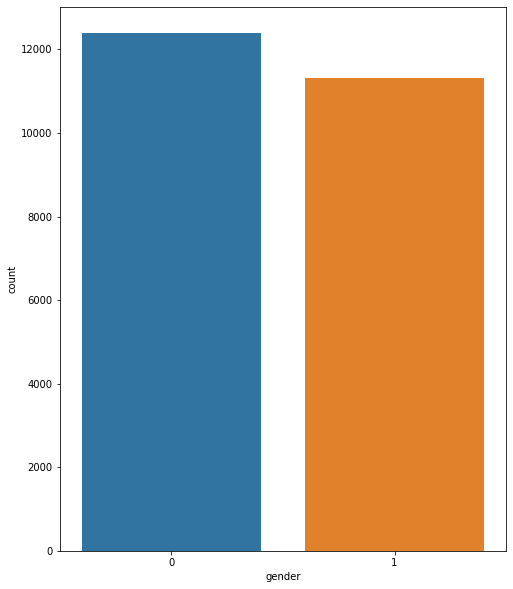

In [7]:
# lets see age distribution
plt.figure(figsize=(8,10)) 
sns.countplot(df["gender"])
plt.show()

In [8]:
#  Gender is equally divided.
# 

In [9]:
# Input image configuration
num_pixels = len(df['pixels'][0].split(' '))
dimension = int(np.sqrt(num_pixels))
img_width = dimension
img_height = dimension

print("Pixels: {}".format(num_pixels))
print("Width: {0}, Height: {1}".format(img_width, img_height))

Pixels: 2304
Width: 48, Height: 48


In [10]:
# Splitting dataset into X and y
X_img = df["pixels"].copy()
y_age = df["age"].copy()
y_ethnicity = df["ethnicity"].copy()
y_gender = df["gender"].copy()

In [11]:
X_img = X_img.apply(lambda x: np.array(x.split(), dtype="float32")) #converting data to numpy array
X_img = np.array(X_img)/255.0 # normalization
X_img = np.array([ X_img[i].reshape(48,48,1) for i in range(X_img.shape[0]) ])

print("Traget: X Shape: {}".format(X_img.shape))
print("Current: X Shape: {}".format(X_img.shape))

Traget: X Shape: (23705, 48, 48, 1)
Current: X Shape: (23705, 48, 48, 1)


In [12]:
# splitting the data into train and te sets.
X_train, X_te, y_train, y_te = train_test_split(X_img,y_gender,test_size=0.3,random_state=11)
# splitting 'test' set into validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_te,y_te,test_size=0.15,random_state=11)
print("X_train {},X_test {}, X_val {}".format(X_train.shape,X_test.shape,X_val.shape))
print("y_train {},y_test {}, y_val {}".format(y_train.shape,y_test.shape,y_val.shape))

X_train (16593, 48, 48, 1),X_test (1067, 48, 48, 1), X_val (6045, 48, 48, 1)
y_train (16593,),y_test (1067,), y_val (6045,)


In [13]:
def image_plot(X,y,rows=5,cols=2):
    # rows = 5 # rows in subplots
    # cols = 2 # columns in subplots
    samp = random.sample(range(X_train.shape[0]),rows*cols) #selecting 10 random samples
    x_samp = X[samp,:,:,:]
    y_samp_gender = y[samp]

    
    fig,ax = plt.subplots(rows,cols,figsize=(16,20))
    r = 0
    c = 0   

    for i in range(rows*cols):
        aa = x_samp[i,:,:,:].reshape(48,48)
        ax[r,c].axis("off")
        ax[r,c].imshow(aa,cmap="gray")
    # ax[r,c].set_title(f"Gender: {'Female' if y_samp_gender[i]==1 else 'Male'}")
        c+=1
        if c == cols:
            c=0
            r+=1
        
    return plt.show()

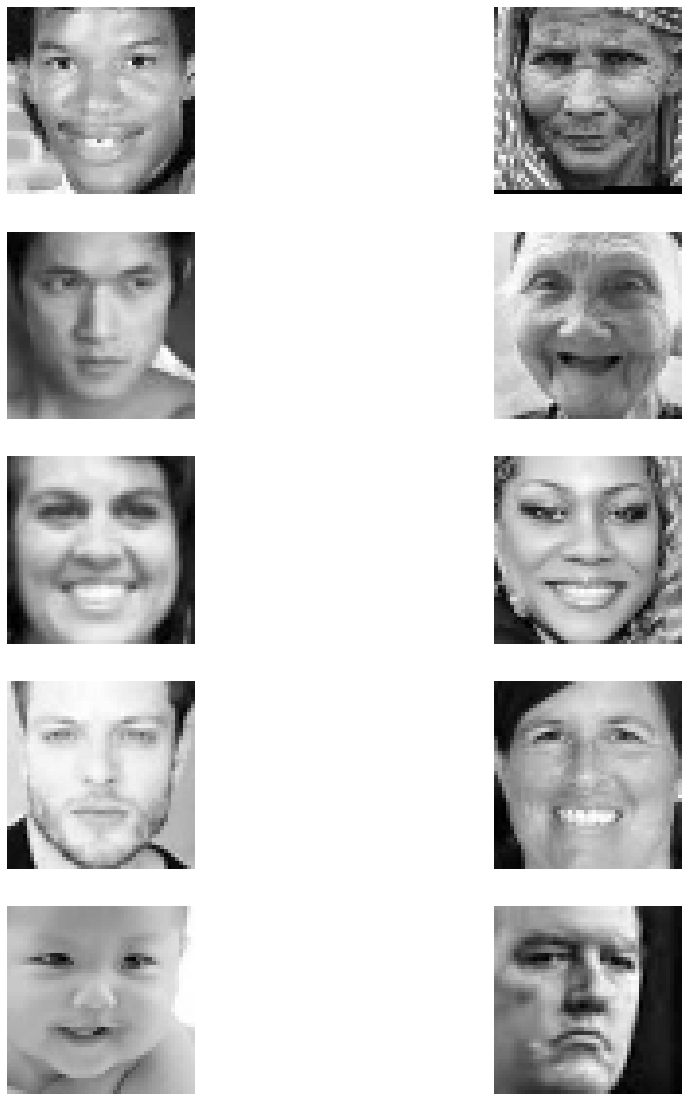

In [14]:
image_plot(X_train,y_gender)

# Image Augmentation

In [15]:
train_data_gen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=1,
                                    brightness_range=[0.8,1.2],
                                    zoom_range=[0.8,1.2],
                                    rescale=1/255
                                   )
val_data_gen = ImageDataGenerator(rescale=1/255)

test_data_gen = ImageDataGenerator(rescale=1/255)

In [16]:
set_seed(11)
random.seed(11)
np.random.seed(11)

val_data = val_data_gen.flow(X_val,y_val,
                                   seed=11,shuffle=False)

test_data = test_data_gen.flow(X_test,y_test,
                                   seed=11,shuffle=False)

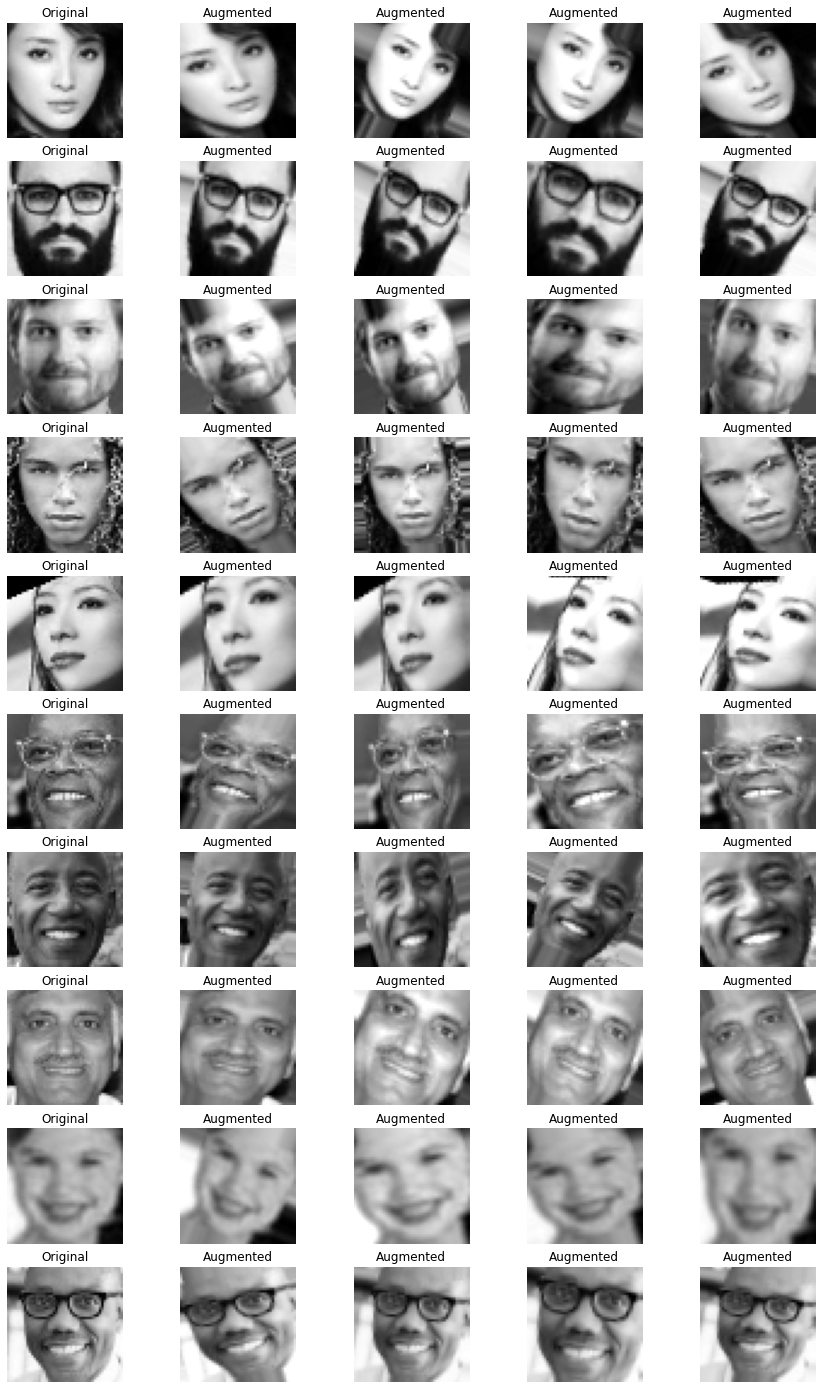

In [17]:
fig,ax = plt.subplots(10,5,figsize=(15,25))
for n in range(10):    
    r = random.sample(range(X_train.shape[0]),1)[0]
    ax[n,0].imshow(X_train[r].reshape(48,48),cmap="gray")
    ax[n,0].set_title("Original")
    ax[n,0].axis("off")
    for i in range(1,5):
        ax[n,i].imshow(train_data_gen.random_transform(X_train[r]).reshape(48,48),cmap="gray")
        ax[n,i].set_title("Augmented")
        ax[n,i].axis("off")
plt.show()

# Model to predict Gender

In [18]:
# handling y_train
y_train_copy=y_train.copy()
y_test_copy=y_test.copy()
# changing our last features
y_train=to_categorical(y_train,num_classes=2)
y_val=to_categorical(y_val,num_classes=2)
print(y_train.shape)
print(y_val.shape)

(16593, 2)
(6045, 2)


In [19]:
#  CNN model

img_rows=48
img_cols=48
input_shape = (img_rows, img_cols, 1)

model_=Sequential()
# convolution layer
model_.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape,activation="relu",strides=(1,1)))
model_.add(BatchNormalization())
model_.add(Dropout(0.5))
model_.add(Conv2D(32,kernel_size=(3,3),activation='relu',strides=(1,1)))
model_.add(BatchNormalization())
model_.add(Dropout(0.5))
#maxpooling layer
model_.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#flattening layer
model_.add(Flatten())
model_.add(Dense(units=4096,activation="relu"))
model_.add(Dense(units=512,activation="relu"))
model_.add(Dropout(0.5))
model_.add(Dense(units=2, activation="sigmoid"))
# compiling model
model_.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
print(model_.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 44, 44, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0

In [21]:
# defining epochs and batch_size
epochs=30
batch_size=128

In [22]:
# Training model
model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val),)

Epoch 1/30
130/130 [==============================] - 6s 27ms/step - loss: 5.6205 - accuracy: 0.6095 - val_loss: 87.5063 - val_accuracy: 0.5289
Epoch 2/30
130/130 [==============================] - 3s 24ms/step - loss: 0.4963 - accuracy: 0.7198 - val_loss: 120.8689 - val_accuracy: 0.5289
Epoch 3/30
130/130 [==============================] - 3s 24ms/step - loss: 0.4014 - accuracy: 0.8146 - val_loss: 101.4467 - val_accuracy: 0.5289
Epoch 4/30
130/130 [==============================] - 3s 24ms/step - loss: 0.3541 - accuracy: 0.8406 - val_loss: 68.6422 - val_accuracy: 0.5295
Epoch 5/30
130/130 [==============================] - 3s 24ms/step - loss: 0.3213 - accuracy: 0.8530 - val_loss: 12.5836 - val_accuracy: 0.6731
Epoch 6/30
130/130 [==============================] - 3s 24ms/step - loss: 0.2958 - accuracy: 0.8687 - val_loss: 0.5599 - val_accuracy: 0.8629
Epoch 7/30
130/130 [==============================] - 3s 24ms/step - loss: 0.2752 - accuracy: 0.8859 - val_loss: 1.3066 - val_accuracy:

In [23]:
y_test=to_categorical(y_test,num_classes=2)

In [24]:
model_.evaluate(X_test,y_test)

34/34 [==============================] - 0s 4ms/step - loss: 0.9784 - accuracy: 0.8679


[0.9784436821937561, 0.8678538203239441]

In [25]:
model_.evaluate(X_train,y_train)

519/519 [==============================] - 2s 3ms/step - loss: 0.2603 - accuracy: 0.9558


[0.26028913259506226, 0.9557644724845886]

In [26]:
# We are getting 86 % accuracy on test dataset classification
# 95 % accuracy on training dataset
# we can set our model is overfitting or have high variance

In [27]:
print(type(y_test))
print(type(y_test_copy))
y_test_copy=np.array(y_test_copy)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


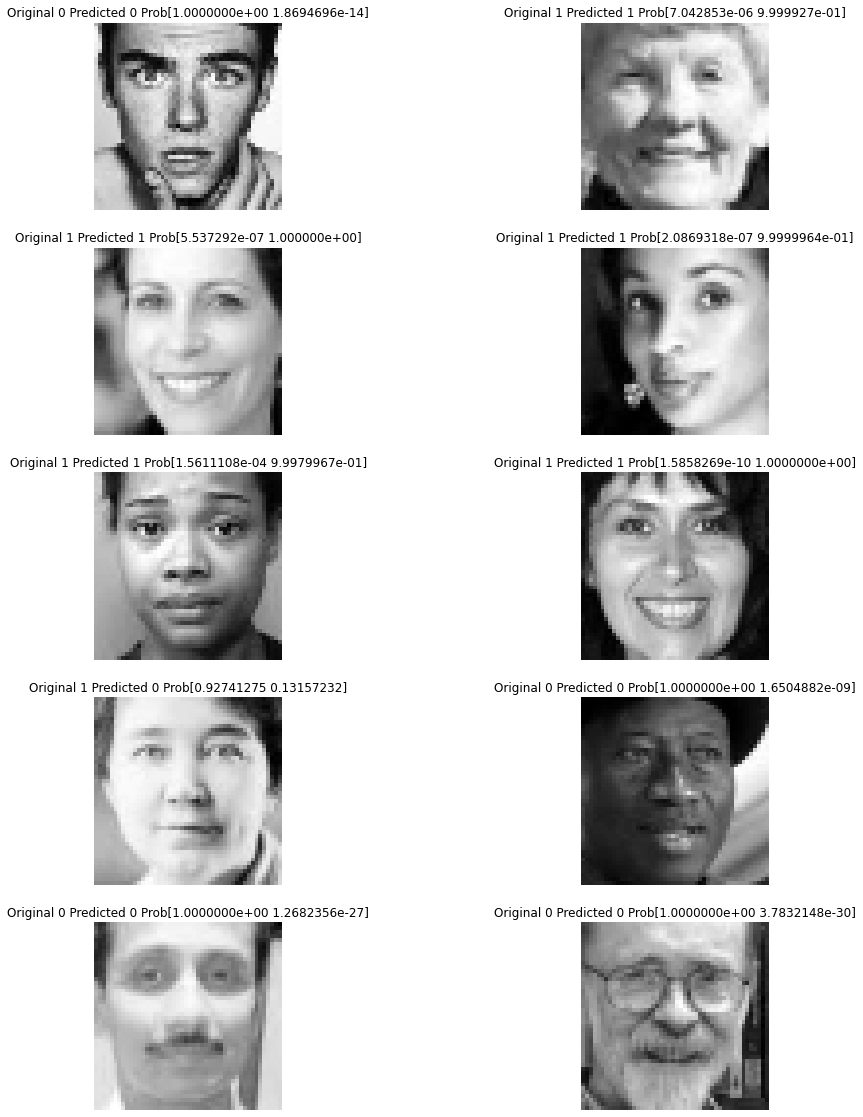

In [28]:
# taking random 10 images and predicting there age
rows = 5 # rows in subplots
cols = 2 # columns in subplots
samp = random.sample(range(X_test.shape[0]),rows*cols) #selecting 10 random samples
x_samp = X_test[samp,:,:,:]
y_samp_gender = y_test_copy[samp]
pred=X_test[samp,:,:,:]
    
fig,ax = plt.subplots(rows,cols,figsize=(16,20))
r = 0
c = 0   

for i in range(rows*cols):
    aa = x_samp[i,:,:,:].reshape(48,48)
    ax[r,c].axis("off")
    ax[r,c].imshow(aa,cmap="gray")
    ax[r,c].set_title("Original "+str(y_samp_gender[i])+" Predicted "+str(model_.predict_classes(pred)[i])+" Prob"+str(model_.predict_proba(pred)[i]))
    c+=1
    if c == cols:
        c=0
        r+=1
        
plt.show()

In [29]:
y_test_pred_test=model_.predict_classes(X_test)
y_test_pred_test_prob=model_.predict(X_test)

In [30]:
print(confusion_matrix(y_test_copy,y_test_pred_test))

[[489  41]
 [100 437]]


In [31]:
# storing wrong classified image from test dataset for analysis.

wrong_classified=[]
wrong_classified_prob=[]
original_=[]
predicted_=[]
for i in range(0, len(y_test)):
    if y_test_copy[i]!=y_test_pred_test[i]:
        wrong_classified.append(X_test[i])
        wrong_classified_prob.append(y_test_pred_test_prob[i])
        original_.append(y_test_copy[i])
        predicted_.append(y_test_pred_test[i])




print(len(wrong_classified))


141


In [34]:
type(wrong_classified)

numpy.ndarray

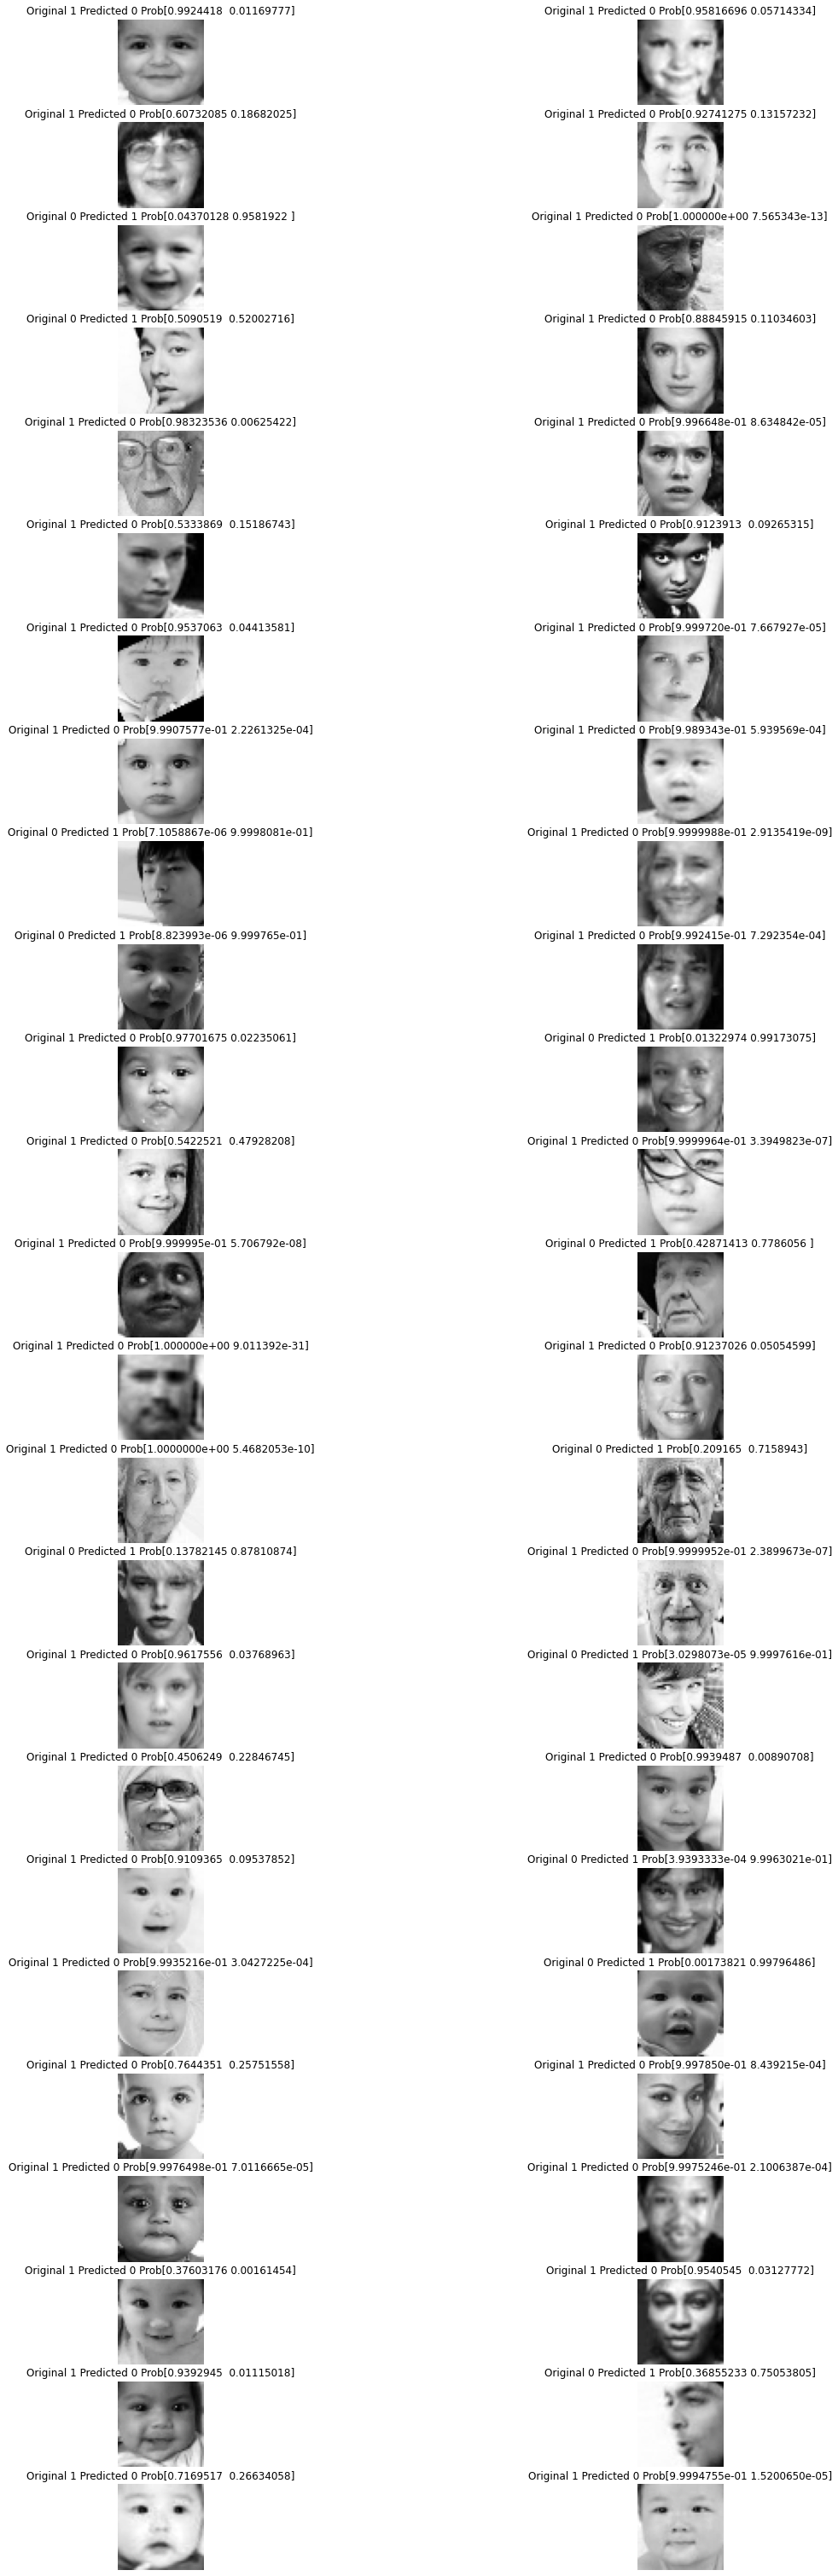

In [39]:
rows =  25 # rows in subplots
cols = 2 # columns in subplots

fig,ax = plt.subplots(rows,cols,figsize=(20,55))
r = 0
c = 0   

for i in range(rows*cols):
    aa = wrong_classified[i,:,:,:].reshape(48,48)
    ax[r,c].axis("off")
    ax[r,c].imshow(aa,cmap="gray")
    ax[r,c].set_title("Original "+str(original_[i])+" Predicted "+str(predicted_[i])+" Prob"+str(wrong_classified_prob[i]))
    c+=1
    if c == cols:
        c=0
        r+=1
        
plt.show()

It seem like model is failed  predicting gender of children more or old people.

### What Next

1. We manually build CNN architecture with 2 convolutional 1 maxpooling layer , 3 fully connected layers and to stop model to overfit we have used Batchnormalization and dropout of .50 . <br> 
2.We got 86% accuracy in test data.<br>
3.In analysing wrong classified image what we have found that mostly model failed in classifing gender of child. <br>
5. Data used in this is focussed in only faces and grayscale in realworld we have images with background, hence if our model is used to classify them chances of classifying wrong is high. <br>

4.What we can do, for more accuracy we can use transfer learning with some state of art model like vgg16,googlenet resnet. <br>

